In [37]:
library("ggplot2")
library("Rlab")

In [38]:
SEED <- 1166
SAMPLE_COUNT <- 2500
BERNOULLI_P <- 0.5
CONF_LEVEL <- 0.97
N <- c(30, 50, 100, 200, 300, 500, 1000)

In [39]:
set.seed(SEED)

In [40]:
method_1 <- function(samples, conf_level) {
    len <- length(samples)
    mean <- mean(samples)
    z <- qnorm((1 + conf_level) / 2)

    denom <- 2 * (1 + z**2 / len)
    upper <- ((2 * mean + z**2 / len) + sqrt(4 * mean * z**2 * (1 - mean) / len + z**4 / len**2)) / denom
    lower <- ((2 * mean + z**2 / len) - sqrt(4 * mean * z**2 * (1 - mean) / len + z**4 / len**2)) / denom

    return(abs(upper - lower))
}

method_2 <- function(samples, conf_level) {
    len <- length(samples)
    mean <- mean(samples)

    upper <- mean + qnorm(1 - (1 - conf_level) / 2) * sqrt(mean * (1 - mean) / len)
    lower <- mean - qnorm(1 - (1 - conf_level) / 2) * sqrt(mean * (1 - mean) / len)

    return(abs(upper - lower))
}

In [41]:
df <- data.frame()
for (n in N) {
    method_diffs <- c()
    for (i in 1:SAMPLE_COUNT) {
        samples <- rbern(n, BERNOULLI_P)
        diff <- method_2(samples, CONF_LEVEL) - method_1(samples, CONF_LEVEL)
        method_diffs <- append(method_diffs, diff)
    }
    mean_diffs <- mean(method_diffs)

    df <- rbind(df, data.frame(n = n, difference = mean_diffs))
}

df

n,difference
<dbl>,<dbl>
30,0.0264730406
50,0.0131174680
100,0.0048636924
200,0.0017619422
300,0.0009669455
500,0.0004524768
1000,0.0001607671


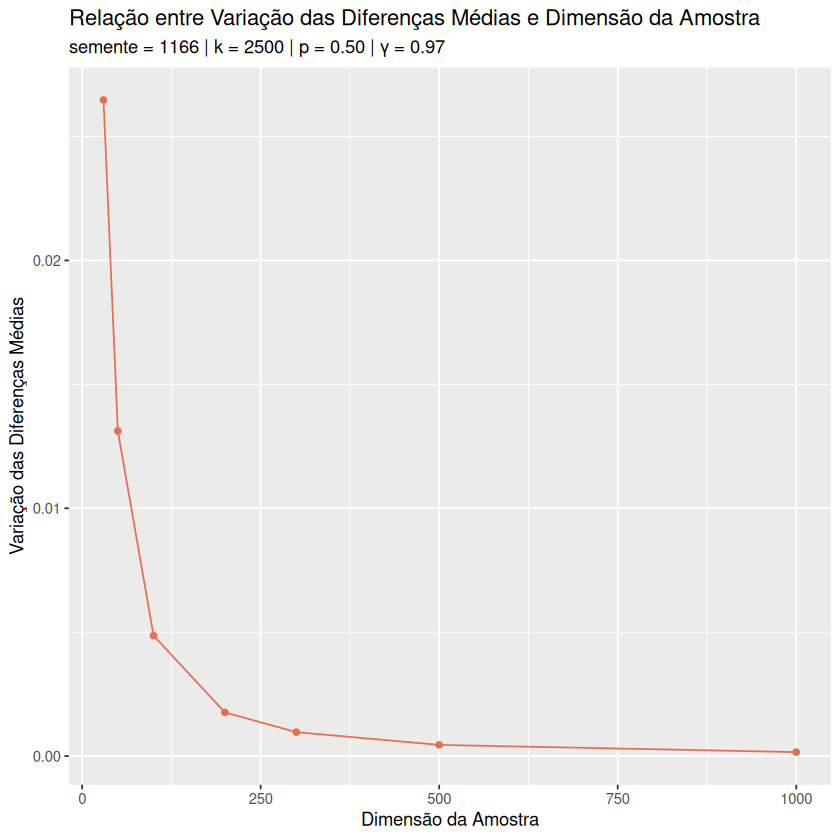

In [42]:
ggplot(df, aes(x = n, y = difference)) +
  geom_line(color = "#e76f51") +
  geom_point(color = "#e76f51") +
  xlab("Dimensão da Amostra") +
  ylab("Variação das Diferenças Médias") +
  labs(title = "Relação entre Variação das Diferenças Médias e Dimensão da Amostra",
    subtitle = sprintf("semente = %d | k = %d | p = %.2f | γ = %.2f",
      SEED, SAMPLE_COUNT, BERNOULLI_P, CONF_LEVEL))

In [43]:
ggsave("ex09.png", width = 16.5, height = 16.5, units = "cm")